In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

red = pd.read_csv("C:\Coding\Python3\DL/winequality-red.csv")
red.tail()

In C:\Coding\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Coding\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Coding\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [4]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
type(red)

pandas.core.frame.DataFrame

In [6]:
red.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [7]:
red.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

'fixed acidity' : '고정 산도', 'volatile acidity' :'휘발성 산도',
'citric acid' '구연산',        'residual sugar': '잔류 당',
'chlorides': '염화물,          'free sulfur dioxide':'이산화황x',
'total sulfur dioxide':'총 이산화황', 'density': '밀도',
'pH':'pH',                     'sulphates':'황산염',
'alcohol': '알코올',           'quality' :'품질'

In [8]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
# 스케일링 MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
X = red[red.columns.difference(['quality'])]
X.head()

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,total sulfur dioxide,volatile acidity
0,9.4,0.076,0.00,0.9978,7.4,11.0,3.51,1.9,0.56,34.0,0.70
1,9.8,0.098,0.00,0.9968,7.8,25.0,3.20,2.6,0.68,67.0,0.88
2,9.8,0.092,0.04,0.9970,7.8,15.0,3.26,2.3,0.65,54.0,0.76
3,9.8,0.075,0.56,0.9980,11.2,17.0,3.16,1.9,0.58,60.0,0.28
4,9.4,0.076,0.00,0.9978,7.4,11.0,3.51,1.9,0.56,34.0,0.70


In [10]:
scaler.fit(X)

X_scaled = scaler.transform(X)

In [11]:
X_scaled = pd.DataFrame(X_scaled)

In [12]:
X_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.153846,0.106845,0.00,0.567548,0.247788,0.140845,0.606299,0.068493,0.137725,0.098940,0.397260
1,0.215385,0.143573,0.00,0.494126,0.283186,0.338028,0.362205,0.116438,0.209581,0.215548,0.520548
2,0.215385,0.133556,0.04,0.508811,0.283186,0.197183,0.409449,0.095890,0.191617,0.169611,0.438356
3,0.215385,0.105175,0.56,0.582232,0.584071,0.225352,0.330709,0.068493,0.149701,0.190813,0.109589
4,0.153846,0.106845,0.00,0.567548,0.247788,0.140845,0.606299,0.068493,0.137725,0.098940,0.397260


In [13]:
X_scaled.columns = X.columns
X_scaled.head()

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,total sulfur dioxide,volatile acidity
0,0.153846,0.106845,0.00,0.567548,0.247788,0.140845,0.606299,0.068493,0.137725,0.098940,0.397260
1,0.215385,0.143573,0.00,0.494126,0.283186,0.338028,0.362205,0.116438,0.209581,0.215548,0.520548
2,0.215385,0.133556,0.04,0.508811,0.283186,0.197183,0.409449,0.095890,0.191617,0.169611,0.438356
3,0.215385,0.105175,0.56,0.582232,0.584071,0.225352,0.330709,0.068493,0.149701,0.190813,0.109589
4,0.153846,0.106845,0.00,0.567548,0.247788,0.140845,0.606299,0.068493,0.137725,0.098940,0.397260


In [15]:
import statsmodels.api as sm
y = red['quality']

X_scaled = sm.add_constant(X_scaled)
model = sm.OLS(y, X_scaled).fit()  
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Wed, 26 May 2021   Prob (F-statistic):          1.79e-145
Time:                        20:01:50   Log-Likelihood:                -1569.1
No. Observations:                1599   AIC:                             3162.
Df Residuals:                    1587   BIC:                             3227.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.7126      0.151     37.846      0.000       5.416       6.009
alcohol                  1.7953      0.172     10.429      0.000       1.458       2.133
chlorides               -1.1227      0.251     -4.470      0.000      -1.615      -0.630
citric acid             -0.1826      0.147     -1.240      0.215      -0.471       0.106
density                 -0.2435      0.295     -0.827      0.409      -0.821       0.334
fixed acidity            0.2824      0.293      0.963      0.336      -0.293       0.858
free sulfur dioxide      0.3097      0.154      2.009      0.045       0.007       0.612
pH                      -0.5253      0.243     -2.159      0.031      -1.003      -0.048
residual sugar           0.2384      0.219      1.089      0.276      -0.191       0.668
sulphates                1.5303      0.191      8.014      0.000       1.156       1.905
total sulfur dioxide    -0.9239      0.206     -4.480      0.000      -1.328      -0.519
volatile acidity        -1.5820      0.177     -8.948      0.000      -1.929      -1.235
==============================================================================
Omnibus:                       27.376   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.965
Skew:                          -0.168   Prob(JB):                     1.27e-09
Kurtosis:                       3.708   Cond. No.                         40.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

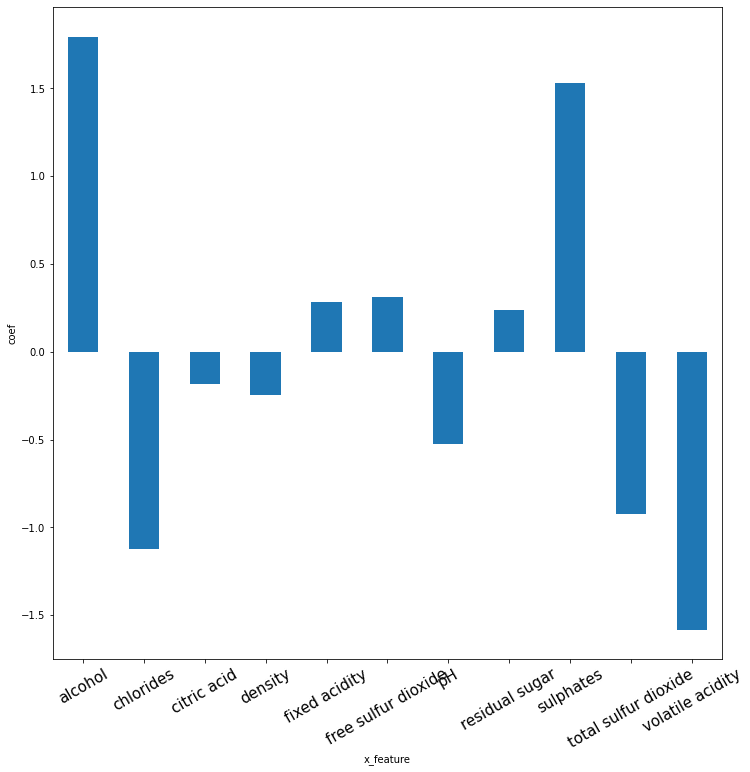

In [16]:
# 회귀계수를 이용해서 시각화
plt.rcParams['figure.figsize'] = [12,12]
coefs = model.params.tolist()[1:]      # params = parameters
coef_series = pd.Series(coefs)

x_labels = model.params.index.tolist()[1:]

ax = coef_series.plot(kind = 'bar')
ax.set_ylabel('coef')
ax.set_xlabel('x_feature')
ax.set_xticklabels(x_labels, rotation=30, fontsize=15)
plt.show()

In [17]:
# 회귀분석의 예측 성능을 높이기 위한 방법 : 다중 공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 피처들의 VIF 계수 출력
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]
vif['feature'] = X_scaled.columns
vif.round(1)

,VIF Factor,feature
0,86.8,const
1,3.0,alcohol
2,1.5,chlorides
3,3.1,citric acid
4,6.3,density
5,7.8,fixed acidity
6,2.0,free sulfur dioxide
7,3.3,pH
8,1.7,residual sugar
9,1.4,sulphates


### 다중공선성 확인결과
#### VIF Factor 계수가 10을 넘는 것이 없으므로, 삭제할 피처가 없음

In [18]:
vif[1:]

,VIF Factor,feature
1,3.031160,alcohol
2,1.481932,chlorides
3,3.128022,citric acid
4,6.343760,density
5,7.767512,fixed acidity
6,1.963019,free sulfur dioxide
7,3.329732,pH
8,1.702588,residual sugar
9,1.429434,sulphates
10,2.186813,total sulfur dioxide


In [19]:
corr = vif[1:].corr()
corr

,VIF Factor
VIF Factor,1.0


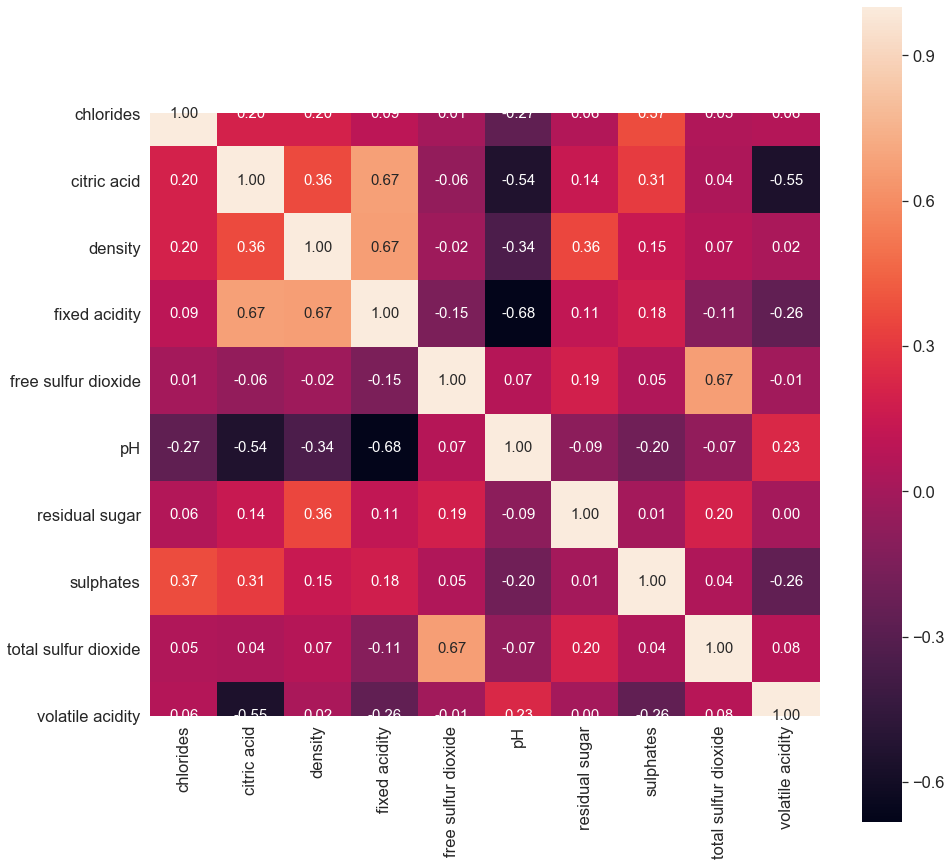

In [19]:
scale_columns = X_scaled.columns[1:]

corr = X_scaled[scale_columns].corr(method='pearson')
show_cols = X_scaled.columns[1:]

plt.rcParams['figure.figsize'] = [15, 15]
plt.rc('font', family='Malgun Gothic')
sns.set(font_scale=1.5)       # 폰트 비율
hm = sns.heatmap(corr.values,
                 cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size':15},
                yticklabels=show_cols,
                xticklabels=show_cols)
plt.show()

In [20]:
X_scaled = X_scaled[X_scaled.columns.difference(['const','free sulfur dioxide','total sulfur dioxide'])]
X_scaled.head()

,alcohol,chlorides,citric acid,density,fixed acidity,pH,residual sugar,sulphates,volatile acidity
0,0.153846,0.106845,0.00,0.567548,0.247788,0.606299,0.068493,0.137725,0.397260
1,0.215385,0.143573,0.00,0.494126,0.283186,0.362205,0.116438,0.209581,0.520548
2,0.215385,0.133556,0.04,0.508811,0.283186,0.409449,0.095890,0.191617,0.438356
3,0.215385,0.105175,0.56,0.582232,0.584071,0.330709,0.068493,0.149701,0.109589
4,0.153846,0.106845,0.00,0.567548,0.247788,0.606299,0.068493,0.137725,0.397260


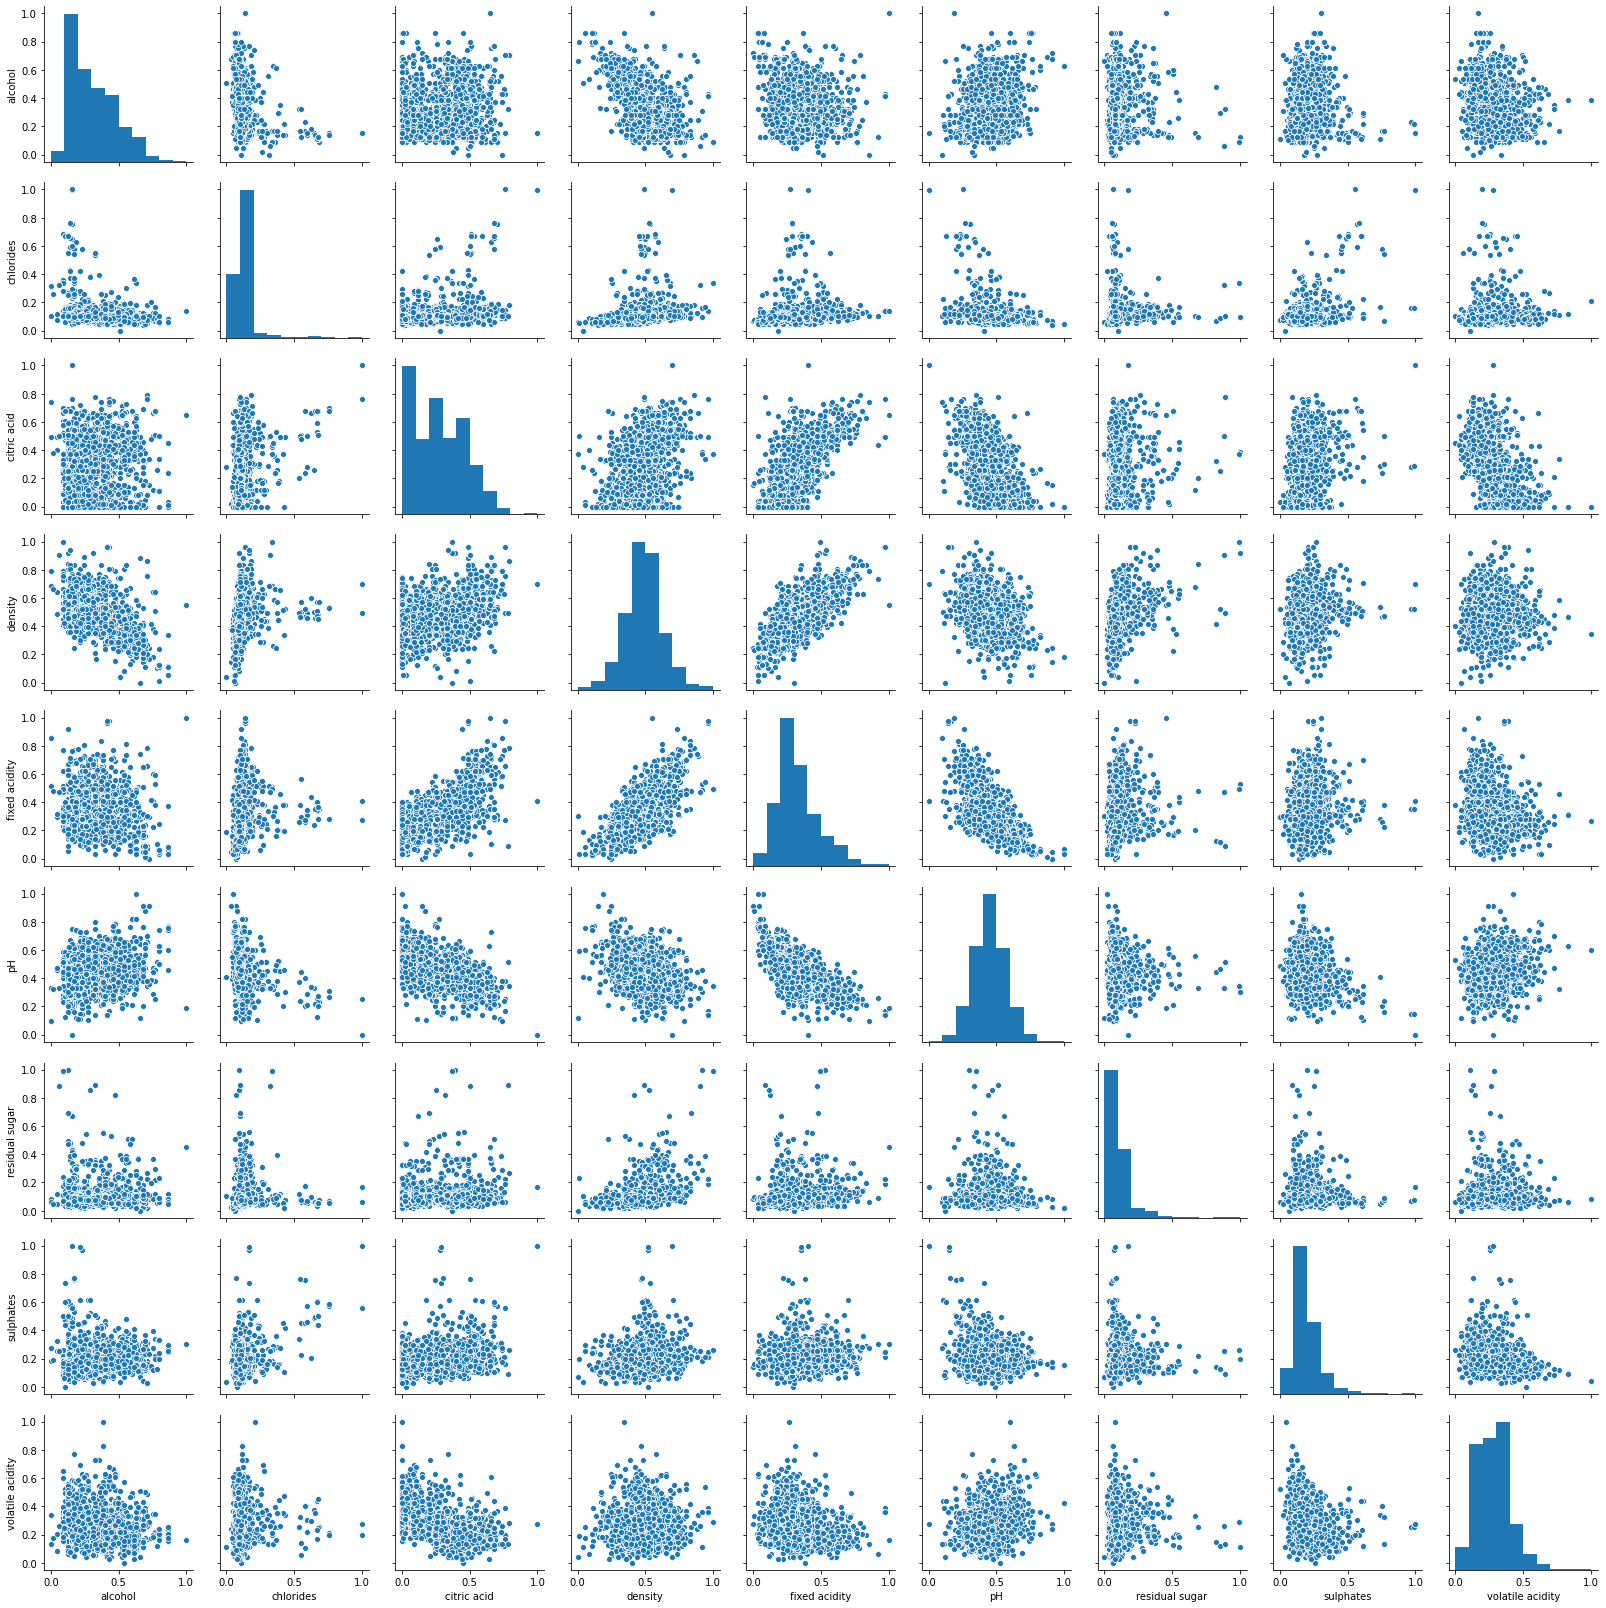

In [21]:
sns.pairplot(X_scaled)
plt.show()

'fixed acidity' : '고정 산도', 'volatile acidity' :'휘발성 산도',
'citric acid' '구연산',        'residual sugar': '잔류 당',
'chlorides': '염화물,          'free sulfur dioxide':'유리아황산',
'total sulfur dioxide':'총 이산화황', 'density': '밀도',
'pH':'pH',                     'sulphates':'황산염',
'alcohol': '알코올',           'quality' :'품질'

In [22]:
red_final = red[red.columns.difference(['free sulfur dioxide','total sulfur dioxide'])]
red_final.tail()

,alcohol,chlorides,citric acid,density,fixed acidity,pH,quality,residual sugar,sulphates,volatile acidity
1594,10.5,0.090,0.08,0.99490,6.2,3.45,5,2.0,0.58,0.600
1595,11.2,0.062,0.10,0.99512,5.9,3.52,6,2.2,0.76,0.550
1596,11.0,0.076,0.13,0.99574,6.3,3.42,6,2.3,0.75,0.510
1597,10.2,0.075,0.12,0.99547,5.9,3.57,5,2.0,0.71,0.645
1598,11.0,0.067,0.47,0.99549,6.0,3.39,6,3.6,0.66,0.310


In [23]:
red_final = red_final[['alcohol', 'chlorides', 'citric acid', 'density', 'fixed acidity', 'pH',
                      'residual sugar', 'sulphates', 'volatile acidity', 'quality']]
red_final.tail()

,alcohol,chlorides,citric acid,density,fixed acidity,pH,residual sugar,sulphates,volatile acidity,quality
1594,10.5,0.090,0.08,0.99490,6.2,3.45,2.0,0.58,0.600,5
1595,11.2,0.062,0.10,0.99512,5.9,3.52,2.2,0.76,0.550,6
1596,11.0,0.076,0.13,0.99574,6.3,3.42,2.3,0.75,0.510,6
1597,10.2,0.075,0.12,0.99547,5.9,3.57,2.0,0.71,0.645,5
1598,11.0,0.067,0.47,0.99549,6.0,3.39,3.6,0.66,0.310,6


- 정규화 안한거 - red_final
- 정규화(품질 빼고) - X_scaled

In [24]:
red_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   alcohol           1599 non-null   float64
 1   chlorides         1599 non-null   float64
 2   citric acid       1599 non-null   float64
 3   density           1599 non-null   float64
 4   fixed acidity     1599 non-null   float64
 5   pH                1599 non-null   float64
 6   residual sugar    1599 non-null   float64
 7   sulphates         1599 non-null   float64
 8   volatile acidity  1599 non-null   float64
 9   quality           1599 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 125.0 KB


In [25]:
X_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   alcohol           1599 non-null   float64
 1   chlorides         1599 non-null   float64
 2   citric acid       1599 non-null   float64
 3   density           1599 non-null   float64
 4   fixed acidity     1599 non-null   float64
 5   pH                1599 non-null   float64
 6   residual sugar    1599 non-null   float64
 7   sulphates         1599 non-null   float64
 8   volatile acidity  1599 non-null   float64
dtypes: float64(9)
memory usage: 112.6 KB


In [26]:
red_final2 = red_final[red_final.columns[:-1]]

In [27]:
red_final2.head()

,alcohol,chlorides,citric acid,density,fixed acidity,pH,residual sugar,sulphates,volatile acidity
0,9.4,0.076,0.00,0.9978,7.4,3.51,1.9,0.56,0.70
1,9.8,0.098,0.00,0.9968,7.8,3.20,2.6,0.68,0.88
2,9.8,0.092,0.04,0.9970,7.8,3.26,2.3,0.65,0.76
3,9.8,0.075,0.56,0.9980,11.2,3.16,1.9,0.58,0.28
4,9.4,0.076,0.00,0.9978,7.4,3.51,1.9,0.56,0.70


In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(red_final2,y,
                                                    stratify=y, test_size=0.2, random_state=42)

In [29]:
x_train.shape

(1279, 9)

In [30]:
x_test.shape

(320, 9)

In [31]:
y_train.shape

(1279,)

In [32]:
y_test.shape

(320,)

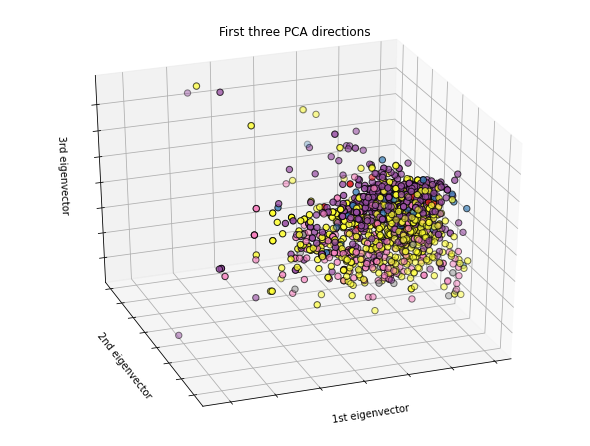

In [42]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(red_final2[red_final2.columns[:]])
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
plt.show()

In [41]:
x = red_final2[red_final2.columns[:]].values
y = red['quality'].values
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='newton-cg', max_iter=100).fit(x, y)
predict = clf.predict(x)
accuracy=(predict.reshape(-1,1) == y.reshape(-1,1)).sum()/len(y)
print(accuracy)

0.5847404627892433


In [38]:
# 로지스틱 회귀 모델 훈련시키는 방법
neuron = LogisticNeuron()
neuron.fit(x_train, y_train)

NameError: name 'LogisticNeuron' is not defined

In [ ]:
# 모델 정확도 평가
np.mean(neuron.predict(x_test) == y_test)